In [2]:
import numpy as np
import matplotlib.pyplot as plt

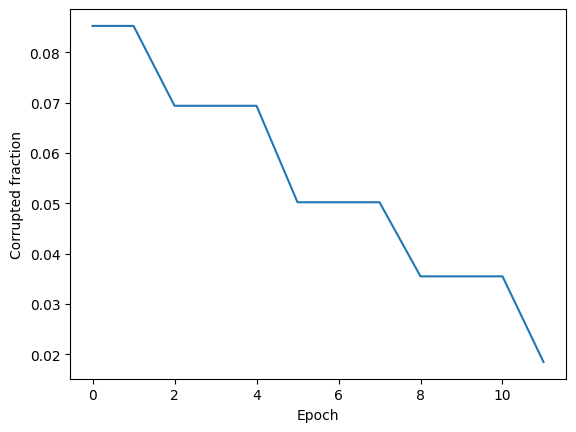

In [61]:
data = np.load('outputs/adamw_corrupted/losses.npy')
true_labels = np.load('outputs/adamw_corrupted/true_labels.npy')
corrupted_labels = np.load('outputs/adamw_corrupted/corrupted_labels.npy')
labels_history = np.load('outputs/adamw_corrupted/labels_history.npy')
is_corrupted = corrupted_labels != true_labels

corrupted_fraction = (labels_history == true_labels).sum(axis=1) / labels_history.shape[1]
corrupted_fraction = 1 - corrupted_fraction
plt.plot(corrupted_fraction)
plt.xlabel('Epoch')
plt.ylabel('Corrupted fraction')
plt.show()

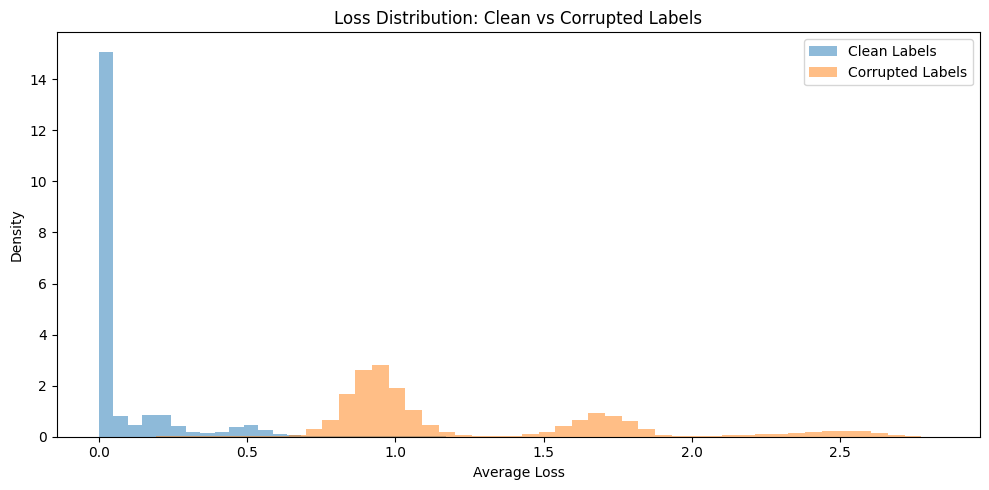

In [59]:
avg_loss = np.clip(data, 0, 4).mean(axis=0)

plt.figure(figsize=(10, 5))

plt.hist(avg_loss[~is_corrupted], bins=50, alpha=0.5, label='Clean Labels', density=True)
plt.hist(avg_loss[is_corrupted], bins=50, alpha=0.5, label='Corrupted Labels', density=True)
plt.xlabel('Average Loss')
plt.ylabel('Density')
plt.title('Loss Distribution: Clean vs Corrupted Labels')
plt.legend()

plt.tight_layout()
plt.savefig('loss_analysis.png')
plt.show()

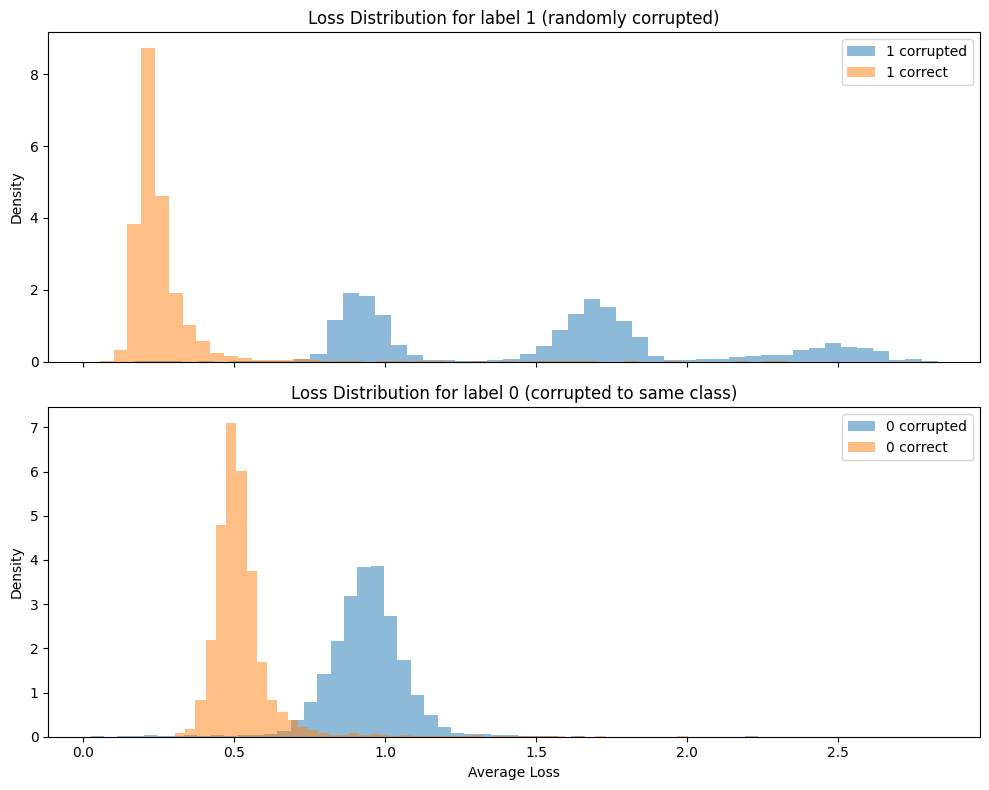

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

axes[0].hist(avg_loss[(true_labels == 1) & is_corrupted], bins=50, alpha=0.5, label='1 corrupted', density=True)
axes[0].hist(avg_loss[(true_labels == 1) & (~is_corrupted)], bins=50, alpha=0.5, label='1 correct', density=True)
axes[0].set_title('Loss Distribution for label 1 (randomly corrupted)')
axes[0].set_ylabel('Density')
axes[0].legend()

axes[1].hist(avg_loss[(true_labels == 0) & is_corrupted], bins=50, alpha=0.5, label='0 corrupted', density=True)
axes[1].hist(avg_loss[(true_labels == 0) & (~is_corrupted)], bins=50, alpha=0.5, label='0 correct', density=True)
axes[1].set_title('Loss Distribution for label 0 (corrupted to same class)')
axes[1].set_xlabel('Average Loss')
axes[1].set_ylabel('Density')
axes[1].legend()

plt.tight_layout()
plt.show()


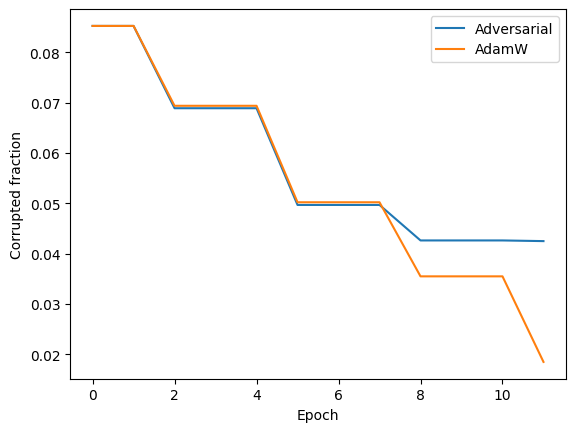

In [63]:
data_adversarial = np.load('outputs/adversarial_corrupted/weights.npy')
true_labels_adversarial = np.load('outputs/adversarial_corrupted/true_labels.npy')
corrupted_labels_adversarial = np.load('outputs/adversarial_corrupted/corrupted_labels.npy')
labels_history_adversarial = np.load('outputs/adversarial_corrupted/labels_history.npy')
is_corrupted_adversarial = corrupted_labels_adversarial != true_labels_adversarial

corrupted_fraction_adversarial = (labels_history_adversarial == true_labels_adversarial).sum(axis=1) / labels_history_adversarial.shape[1]
corrupted_fraction_adversarial = 1 - corrupted_fraction_adversarial

plt.plot(corrupted_fraction_adversarial, label='Adversarial')
plt.plot(corrupted_fraction, label='AdamW')
plt.xlabel('Epoch')
plt.ylabel('Corrupted fraction')
plt.legend()
plt.show()


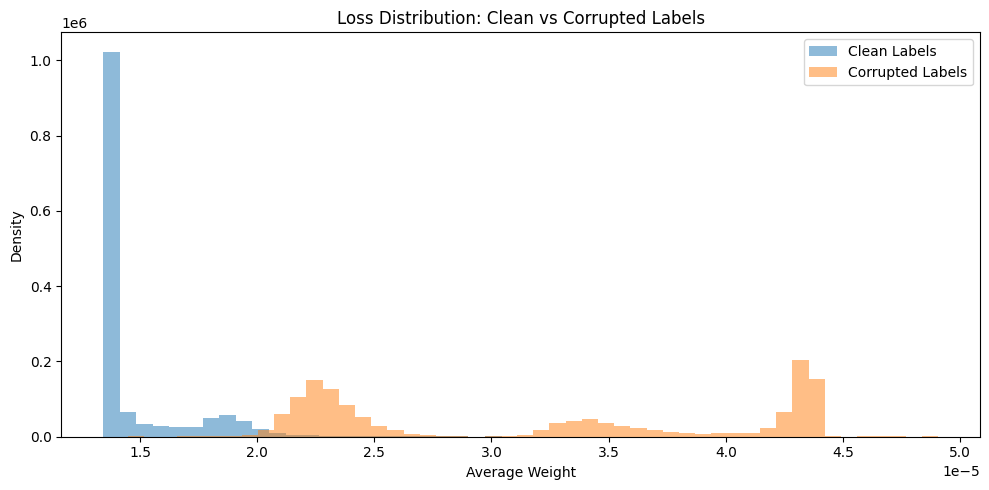

In [66]:
avg_weight = np.clip(data_adversarial, 0, 0.00005).mean(axis=0)

plt.figure(figsize=(10, 5))

plt.hist(avg_weight[~is_corrupted_adversarial], bins=50, alpha=0.5, label='Clean Labels', density=True)
plt.hist(avg_weight[is_corrupted_adversarial], bins=50, alpha=0.5, label='Corrupted Labels', density=True)
plt.xlabel('Average Weight')
plt.ylabel('Density')
plt.title('Loss Distribution: Clean vs Corrupted Labels')
plt.legend()

plt.tight_layout()
plt.show()

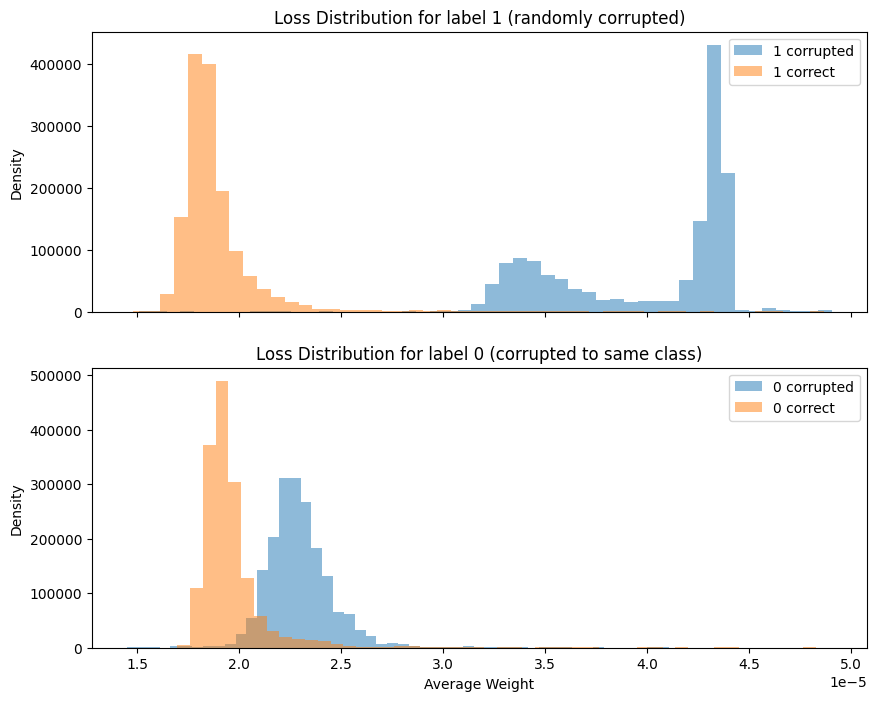

In [67]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

axes[0].hist(avg_weight[(true_labels_adversarial == 1) & is_corrupted_adversarial], bins=50, alpha=0.5, label='1 corrupted', density=True)
axes[0].hist(avg_weight[(true_labels_adversarial == 1) & (~is_corrupted_adversarial)], bins=50, alpha=0.5, label='1 correct', density=True)
axes[0].set_title('Loss Distribution for label 1 (randomly corrupted)')
axes[0].set_ylabel('Density')
axes[0].legend()

axes[1].hist(avg_weight[(true_labels_adversarial == 0) & is_corrupted_adversarial], bins=50, alpha=0.5, label='0 corrupted', density=True)
axes[1].hist(avg_weight[(true_labels_adversarial == 0) & (~is_corrupted_adversarial)], bins=50, alpha=0.5, label='0 correct', density=True)
axes[1].set_title('Loss Distribution for label 0 (corrupted to same class)')
axes[1].set_xlabel('Average Weight')
axes[1].set_ylabel('Density')
axes[1].legend()